**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Dropout

**Read the Dataset**

In [ ]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv('/content/drug200.csv')

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.shape

(200, 6)

**Data Pre-processing**

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# Encode categorical variables as one-hot vectors
df = pd.DataFrame(df, columns=['Sex', 'BP', 'Cholesterol'])

In [ ]:
#Removing Redundant attributes from dataset
df['BP'].fillna(df['BP'].mode()[0], inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].mode()[0], inplace=True)
df['Na_to_K'].fillna(df['Na_to_K'].median(), inplace=True)

In [ ]:
# re-mapping target values to diagnostic group
diagnoses = {'drugA': 'A',
             'drugB': 'B', 
             'drugC': 'C',
             'drugX': 'D',
             'drugY': 'E'}

df['Drug'] = df['Drug'].map(diagnoses)

In [ ]:
# Drop rows with null values
df.dropna(subset=['Drug'],inplace=True)

In [ ]:
df['Drug'].value_counts()

D    54
A    23
C    16
B    16
Name: Drug, dtype: int64

In [ ]:
# Check for values above 100 in 'age' column
age_above_100 = df[df['Age'] > 100]

**Splitting the data x and y**

In [ ]:
# Split the data values as x and y
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
5,22,F,NORMAL,HIGH,8.607
7,41,M,LOW,HIGH,11.037
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [ ]:
x['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
x['Sex'].replace(np.nan, 'F', inplace=True)

In [ ]:
x['Sex'].value_counts()

M    60
F    49
Name: Sex, dtype: int64

**Converting the data type**

In [ ]:
x['Age'] = x['Age'].astype(float)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          109 non-null    float64
 1   Sex          109 non-null    object 
 2   BP           109 non-null    object 
 3   Cholesterol  109 non-null    object 
 4   Na_to_K      109 non-null    float64
dtypes: float64(2), object(3)
memory usage: 5.1+ KB


**Handling Categorical Values**

In [ ]:
#Encoding the categorical data
#Encoding the independent(output)variable
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
# Categorical data

ordinal_encoder = OrdinalEncoder(dtype='int64')
x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])
#ordinal_encoder.fit_transform(x[['Sex]])

<ipython-input-164-066cd326b88c>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])


In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
1,47.0,1,1,0,89
2,47.0,1,1,0,43
3,28.0,0,2,0,10
5,22.0,0,2,0,16
7,41.0,1,1,0,59
...,...,...,...,...,...
195,56.0,0,1,0,69
196,16.0,1,1,0,75
197,52.0,1,2,0,36
198,23.0,1,2,1,102


In [ ]:
x.replace(np.nan, '0',inplace=True)

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
1,47.0,1,1,0,89
2,47.0,1,1,0,43
3,28.0,0,2,0,10
5,22.0,0,2,0,16
7,41.0,1,1,0,59
...,...,...,...,...,...
195,56.0,0,1,0,69
196,16.0,1,1,0,75
197,52.0,1,2,0,36
198,23.0,1,2,1,102


In [ ]:
label_encoder = LabelEncoder()
y_dt=label_encoder.fit_transform(y)

In [ ]:
y=pd.DataFrame(y_dt,columns=['target'])

In [ ]:
y

,target
0,2
1,2
2,3
3,3
4,2
...,...
104,2
105,2
106,3
107,3


**Splitting data into train and test**

In [ ]:
# Split the data values as x and y
x = df.iloc[:,0 :-1]
y = df.iloc[:, -1]

In [ ]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
5,22,F,NORMAL,HIGH,8.607
7,41,M,LOW,HIGH,11.037
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()

D    42
A    17
B    15
C    13
Name: Drug, dtype: int64

**Handling imbalanced data**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y) # resample the original data to balance classes
x_bal, x_test_bal, y_bal, y_test_bal = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42) # split into training and test set

**Applying StandardScaler**

In [ ]:
# standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#x_bal= scaler.fit_transform(x_bal)
#x_test_bal = scaler.transform(x_test_bal_enc)

In [ ]:
columns=['Age','Sex','BP','Cholesterol','Na_to_K']

In [ ]:
x_test_bal = pd.DataFrame(data=x_test, columns=columns)


In [ ]:
x_bal= pd.DataFrame(x_bal,columns = columns)

In [ ]:
x_bal

,Age,Sex,BP,Cholesterol,Na_to_K
84,72,F,LOW,NORMAL,14.642
95,45,M,LOW,NORMAL,10.017
137,26,F,HIGH,NORMAL,12.307
211,47,M,LOW,HIGH,10.114
86,31,M,HIGH,NORMAL,11.227
...,...,...,...,...,...
106,52,M,NORMAL,HIGH,9.894
14,53,M,NORMAL,HIGH,14.133
92,57,F,NORMAL,HIGH,14.216
179,32,F,LOW,HIGH,9.712


**Performing Feature Importance**

Feature: Age                  Score: 0.0
Feature: Sex                  Score: 0.05875000000000001
Feature: BP                   Score: 0.095
Feature: Cholesterol          Score: 0.28125
Feature: Na_to_K              Score: 0.5


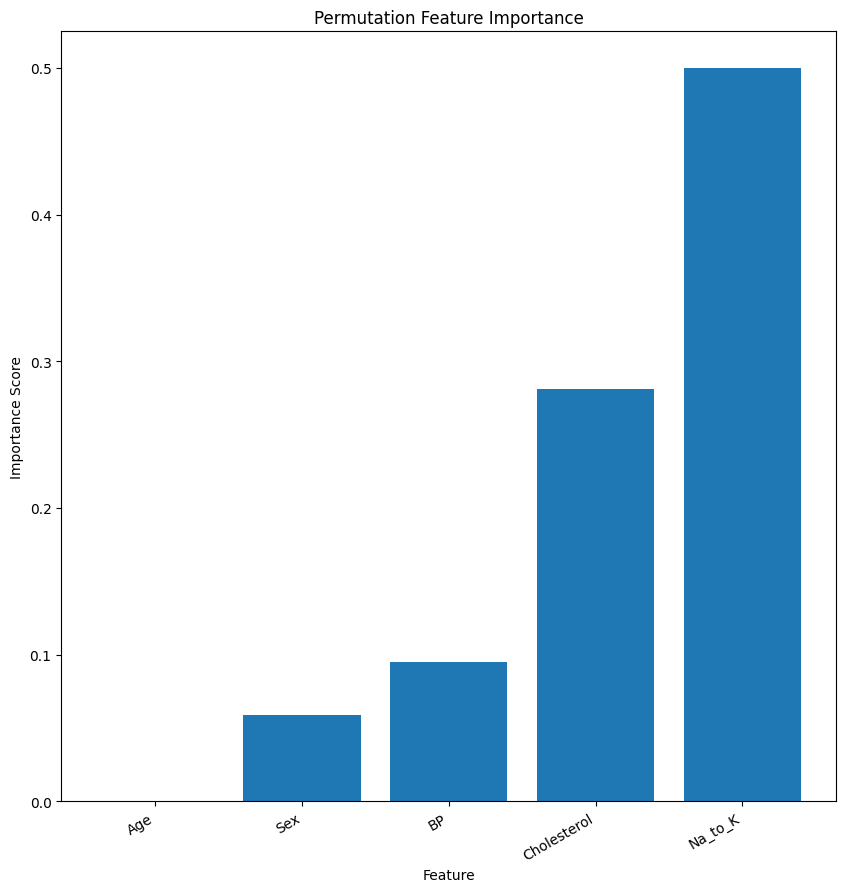

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# Encode categorical features as numeric values
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rfr = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rfr.fit(X_train, y_train)

# Perform feature importance
results = permutation_importance(rfr, X_train, y_train, scoring='accuracy')

# Get feature importances
feature_importance = X_train.columns.tolist()
importance = results.importances_mean
importance = np.sort(importance)

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: {:<20} Score: {}'.format(feature_importance[i], v))

# Plot feature importances
plt.figure(figsize=(10, 10))
plt.bar(x=feature_importance, height=importance)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Permutation Feature Importance')
plt.show()


In [ ]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
5,22,F,NORMAL,HIGH,8.607
7,41,M,LOW,HIGH,11.037


In [ ]:
x_bal = x_bal.drop(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], axis=1)

In [ ]:
x_test_bal = x_test.drop(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], axis=1)

In [ ]:
x_bal.head()

""
84
95
137
211
86


**Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Visual analysis**

**Checking Correlation**

<ipython-input-197-1982371b6aa6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = x.corr()


<Axes: >

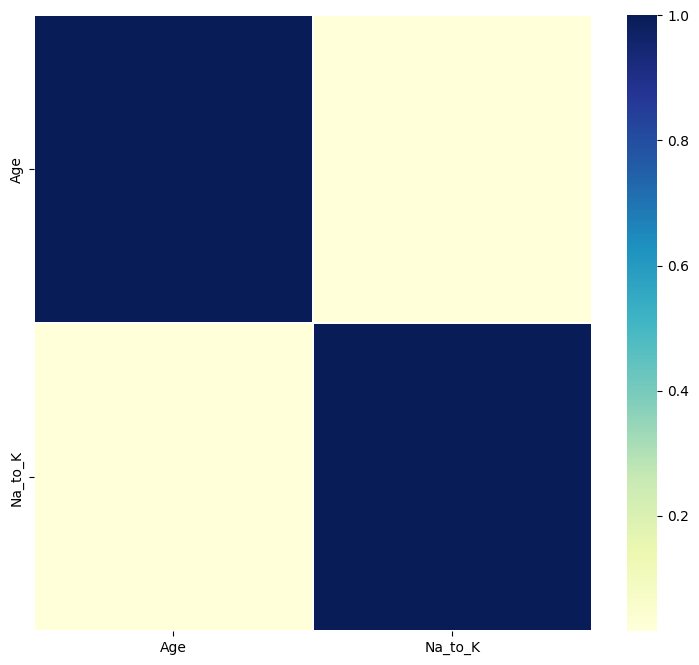

In [ ]:
#checking correlation using Heatmap
import seaborn as sns
corrmat = x.corr()

f, ax = plt.subplots(figsize =(9,8))
sns.heatmap(corrmat, ax = ax,cmap = 'YlGnBu',linewidths = 0.1)

**Model Building**

In [ ]:
# Train the rfr
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train,y_train.values.ravel())
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the target variable using the trained model
y_pred = rf.predict(X_test)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


**XGBClassifier model**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# train XGBClassifier model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# make predictions on test data
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
accuracy_score(y_test, y_pred)

0.9473684210526315

**SVC model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
sv = SVC()

In [ ]:
sv.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = sv.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
train_score = accuracy_score(y_test,sv.predict(X_test))
train_score

0.9473684210526315

**ANN Model**

In [ ]:
# create an ANN model
model = Sequential()

In [ ]:
model.add(Dense(units = 128,activation='relu', input_shape=(10,)))

In [ ]:
model.add(Dense(units=128, activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu', kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu', kernel_initializer='random_uniform'))

In [ ]:
model.add(Dense(units = 1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1408      
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 256)              

In [53]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

**Testing the model**

In [28]:
model.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

1/1 [==============================] - 1s 581ms/step


array([[0.97925574]], dtype=float32)

In [62]:
params = {
      'C':[0.1,1,10,100,1000],
      'gamma':[1,0.1,0.01,0.001,0.0001],
      'kernel':['rdf','sqrt']
}

In [92]:
sv1=SVC(kernel='rbf',gamma=0.1,C=100)

In [107]:
#saving the mode
import pickle

In [109]:
pickle.dump(sv1,open('thyroid_1_model.pkl','wb'))

In [129]:
features = np.array([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

In [116]:
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [126]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

**Model Deployment**

In [127]:
import pickle

In [128]:
pickle.dump(sv1,open('thyroid_1_model.pkl','wb'))